Welcome! You have just launched a live example of an Jupyter Notebook. The notebook is an open-source, interactive computing environment that lets you combine live code, narrative text, mathematics, plots and rich media in one document. Notebook documents provide a complete reproducible record of a computation and its results and can be shared with colleagues (through, for example, email, web-hosting services such as GitHub, Dropbox, and nbviewer).

Adapted from the [Nature IPython Interactive Notebook demo](https://www.nature.com/news/ipython-interactive-demo-7.21492).

You can edit anything in this temporary demonstration notebook, including the text you are reading.

This notebook showcases some of IPython's capabilities for analysts.

# Basic Python code and plotting
The box below (known as a code cell) contains the Python code to plot $y=x^2$ over the range [0,5]. The blue comments preceded by # explain what the code does.

To run the code:

1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button in the toolbar above.

A full tutorial for using the notebook interface is available [here](https://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb).

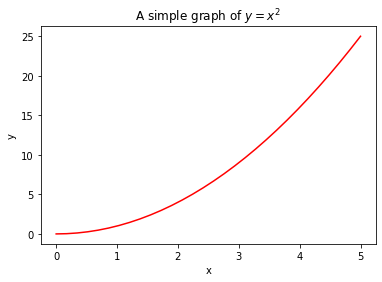

In [1]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

# Create an array of 30 values for x equally spaced from 0 to 5. 
x = np.linspace(0, 5, 30)
y = x**2

# Plot y versus x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple graph of $y=x^2$');

Above, you should see a plot of $y=x^2$.

You can edit this code and re-run it. For example, try replacing y = x**2 with y=np.sin(x). For a list of valid functions, see the NumPy Reference Manual. You can also update the plot title and axis labels.

Text in the plot as well as narrative text in the notebook can contain equations that are formatted using LATEX. To edit text written in LATEX, double click on the text or press ENTER when the text is selected.




# More advanced plotting 

This example uses the the standard ARPS equation to estimate the decline in oil or gas production from an oil well in North Dakota. 

This example uses several Python libraries that are central to data analysis in Python: Pandas and SciPy. These libraries have functions we can use that save us time and ensure the code is consistent and replicable. 

In [3]:
# Import pandas (DataFrames), SciPy (optimization functions), and matplotlib (plotting).
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Creating some functions we can use to calcuate the hyperbolic curve and initial max production level
def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/b)) 

def get_max_initial_production(df, number_first_months, variable_column, date_column):
    df=df.sort_values(by=date_column)
    df_beginning_production=df.head(number_first_months)
    return df_beginning_production[variable_column].max()

# Reading the data into Python and saving it as a Pandas DataFrame
file_path='short.csv'
desired_product_type='Oil' # or 'Gas'
    
df=pd.read_csv(file_path)
df['ReportDate']=pd.to_datetime(df['ReportDate'])

# Evaluating the decline curve and saving it as a column in the DataFrame called "Hyperbolic Predicted"
qi=get_max_initial_production(df, 5, desired_product_type, 'ReportDate')
popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, df['Days_Online'], 
                                    df[desired_product_type],bounds=(0, [qi,2,20]))
df.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(df['Days_Online'], *popt_hyp)

# Plotting the actual and predicted production values
df.plot(x='Days_Online', y=[desired_product_type, "Hyperbolic_Predicted"], 
                                    title=f"Decline curve for {desired_product_type} Production")

interactive(children=(FloatSlider(value=4.0, description='frequency', max=22.0, min=1.0, step=0.5), IntSlider(…

Change the desired product type to 'Gas' and rerun the example. Note how the values and even the title change. 

# Next steps
The IPython Project maintains a curated list of notebooks that provide examples of its use across a wide range of fields and topics. You can find these examples at this gallery.

Directions on how to install software to run the IPython notebook on your own computer can be found here.

It is also possible to run a notebook in the cloud, without installing the software, using AWS SageMaker, among other tools.

The notebook is being moved into a project called Jupyter, which aims to make the IPython software package more compatible with other languages, including Julia and R. Further information can be found on the IPython and Jupyter websites.